In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generalized Monty Hall Problem

## Problem Statement

This is a version of the famous “Monty Hallˮ problem. Context: Suppose you are in a contestant in a game show. In front of you, there
are three identical doors. Behind one door is a new car. Behind the other two
doors are goats. The game works like this:

1. You pick one door.
2. The game show host then opens a different door, revealing a goat. Hence,
two doors remain closed: The one you chose, and the door not opened by
the host.
3. You are then given a second choice:

    - Do you want to stick with your original door choice, or;
    - Switch to the other, unopened door?

## Questions:

1. Statistically, what is the best strategy? Please explain your reasoning.
Assume that you prefer the new car to the goats.
2. Suppose that I donʼt believe in mathematical arguments (even if they are
correct), and only trust numerical experiments. Please code up a python
script/notebook that simulates many iterations of this gameshow, to
convince me that your answer is right. Please include comments.
3. Can you think of a generalisation of this problem to a similar game show
with four or more doors? Clearly define the rules of this game show, and
explain an optimal strategy for it. Note: Here, you will get points for
creativity.

## 1. Question

In addition to the assumptions stated in the problem, I will make another (crucial) assumption which is only implicitly stated: Monty knows behind which door the car is. 

After my initial random pick, Monty is forced to open a door with a goat and presents me with a choice: Pick again or stick with my initial choice. It appears that the odds of winning are now equal. But this is not true!

There are two scenarios:<br>
1. My inital choice was good (car, $p_{ex\_ante\_success} = 1/3$) <br> 
2. My inital choice was bad (goat, $p_{ex\_ante\_fail} = 2/3$)

In the first case, I lose if I choose again. In the second scenario, Monty must open the door with the remaining goat, as per the rules. Hence, he indirectly reveals where the car is. Put differently, given that my first choice was bad, he tells me where the car is. I do not know if my first choice is good or bad. But since my first choice is correct only 33% of the time, I am statistically better off always choosing again as this gives me a 67% chance of winning!

If Monty does not know where the car is, it does not matter if choose again. The oods of winning after Monty opens a door (with a goat) are $50:50$. 

## 2. Question

In [7]:
count_success_stick = 0
count_success_switch = 0
trials = 100000 # we play 100000 times
n_doors = 3 # The simulation is such that it can be adjusted for more doors
n_goats_revealed = 1 # The number of goats that Monty reveals
for i in range(trials):
    success = 0
    car_placement = np.zeros(n_doors, dtype = int) # Create a numpy array with n_doors "doors" 
    car_placement[np.random.choice(n_doors)] = 1 # Put the car behind a random door
    pick = np.random.choice(n_doors)  # Our random choice
    
    if car_placement[pick] == 1: # Check, if the initial choice is good
        # Stick 
        success = 1
        count_success_stick += success  
    else: 
        # Switch 
        # One could argue that the below is a bit "hacky". In the real game, the car does not magically change its position. However, since we 
        # randomely pick again, it does numerically not matter that we also randomely replace the car. 
        new_car_placement = np.zeros(n_doors - n_goats_revealed - 1, dtype = int) # Recall that the space of choices has been reduced (we switched from our initial choice) and Monty reveals one goat.
        # If Monty revealed two goats we could adjust this value ('n_goats_revealed = 2') to simulate a different modified game (Example 4, below).
        new_car_placement[np.random.choice(n_doors - n_goats_revealed - 1)] = 1 
        pick_again = np.random.choice(n_doors - n_goats_revealed - 1)
        if new_car_placement[pick_again] == 1: # Check, if the final choice is good
            success = 1
            count_success_switch += success
print(f"Stick Winning Probability: {count_success_stick/trials:.3f}")
print(f"Switch Winning Probability: {count_success_switch/trials:.3f}")

Stick Winning Probability: 0.334
Switch Winning Probability: 0.666


# 3. Question

One could think of several variations of the game. Examples include:
1. 4 doors (3 goats, 1 car), Monty is forced to reveal **one** goat after my initial choice. I subsequently make my final choice.
2. 4 doors (2 goats, **2 cars**), Monty is forced to reveal one goat after my initial choice. I subsequently make my final choice.
3. 4 doors (3 goats, 1 car), Monty is forced to reveal one goat after my initial choice. I subsequently make my **second choice**. Monty reveals again...
4. 4 doors (3 goats, 1 car), Monty is forced to reveal **two** goats after my initial choice. I subsequently make my final choice.

He never reveals the car.

All cases can be extended to *n* doors with respective adjustments and combinations of the variations (e.g. $m$ revalations by Monty, $j$  cars, and $i$ rounds). In what follows, Ill briefly dig into the first case. 

The optimal strategy remains the same. You always choose again after Monty reveals a goat. Here is why:

$ p_{success\_stay} = \frac{1}{n} $ Random initial choice success probability

$ p_{success\_switch} = (1 - \frac{1}{n}) * \frac{1}{n-2}$  The first part reflects the probability of initially failing, the second part of winning after the final choice.

We could prove analytically that $ p_{success\_switch} \ge p_{success\_stay} $ is always true for $ n > 2 $. However, I choose to use a numerical example as this allows me to visualize the conclusion.

In [13]:
df = pd.DataFrame({'n_doors': range(3, 21)})

In [14]:
df['p_stick'] = 1 / df.n_doors 

In [15]:
df['p_switch'] = (1 - 1 / df.n_doors) * (1 / (df.n_doors - 2)) 

In [16]:
df.head(3)

,n_doors,p_stick,p_switch
0,3,0.333333,0.666667
1,4,0.250000,0.375000
2,5,0.200000,0.266667


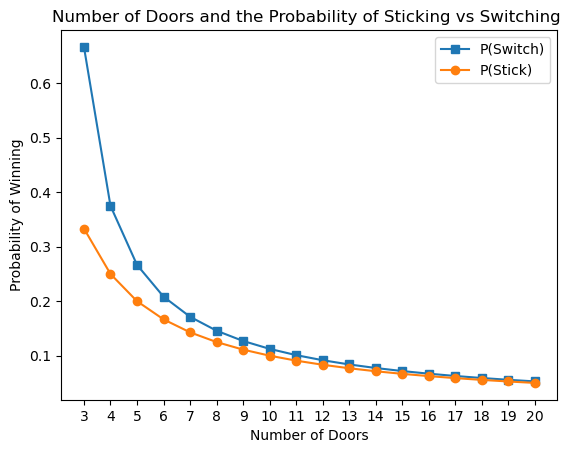

In [17]:
fig, ax = plt.subplots()

# Plot the data
ax.plot(df["n_doors"], df["p_switch"], marker='s', label="P(Switch)")

ax.plot(df["n_doors"], df["p_stick"], marker='o', label="P(Stick)")

# Labels and title
ax.set_xlabel("Number of Doors")
ax.set_ylabel("Probability of Winning")
ax.set_title("Number of Doors and the Probability of Sticking vs Switching ")
ax.set_xticks(df.n_doors)
ax.legend()

# Show the plot
plt.show()


In [18]:
df.tail(2)

,n_doors,p_stick,p_switch
16,19,0.052632,0.055728
17,20,0.050000,0.052778


Unsurprsingly, we observe that the probability of winning decreases in the number of doors. Furthermore, we see that the difference becomes smaller. The intuitive reason is that the chances of picking correctly after one goat has been revealed becomes smaller and smaller, as there are still many goats ($n-2$ remains "large"). 

Feel free to adjust n_doors or the n_goats_revealed in the simulation!